In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("../Data/events.csv", encoding="windows-1252")
df['SubmitDateTime'] = pd.to_datetime(df['SubmitDateTime'], format="%d/%m/%Y %H:%M:%S")

In [3]:
df

,SubmittedAnswerId,SubmitDateTime,Correct,Progress,UserId,ExerciseId,Difficulty,Subject,Domain,LearningObjective,MeanDelta,StdDelta,Quality,CorrectProbability,ExerciseRating
0,2395278,2015-03-02 07:35:38,1,0,40281,1038396,-200.000000,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,4.207491,-1.135836,0.000000,0.000000,25.000000
1,2396494,2015-03-02 07:36:48,1,2,40281,1029120,329.234193,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,3.589332,-0.832088,0.000000,0.000000,30.494777
2,2396638,2015-03-02 07:36:55,1,0,40282,1013670,-200.000000,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,4.207491,-1.135836,0.000000,0.000000,25.000000
3,2396696,2015-03-02 07:36:59,1,2,40281,1029121,353.397286,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,2.622493,-0.584319,0.000000,0.000000,32.412483
4,2397209,2015-03-02 07:37:24,1,0,40285,1038506,-200.000000,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,4.207491,-1.135836,0.000000,0.000000,25.000000
5,2397600,2015-03-02 07:37:43,0,-10,40285,1038509,230.697167,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,-4.806776,-0.936840,0.000000,0.000000,22.674378
6,2397725,2015-03-02 07:37:48,1,0,40285,1038509,230.697167,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,3.891929,-0.776546,0.000000,0.000000,29.116003
7,2397740,2015-03-02 07:37:49,1,2,40282,1013691,323.953290,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,3.498116,-0.822644,0.000000,0.000000,30.075658
8,2397893,2015-03-02 07:37:56,1,0,40282,1013695,191.983914,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,0.865491,-0.311256,0.000000,0.000000,19.601898
9,2398069,2015-03-02 07:38:05,1,4,40282,1013698,417.570959,Begrijpend Lezen,-,Diverse leerdoelen Begrijpend Lezen,3.163157,-0.579656,0.000000,0.000000,37.505632


# Basic statistics

In [4]:
# Percent correct
(df['Correct'] > 0).sum() / len(df)

0.7869141435089174

In [5]:
# Mean/std difficulty
print(f"Mean: {df['Difficulty'].mean()}")
print(f"STD: {df['Difficulty'].std()}")

Mean: 261.58438466043435
STD: 102.20055737741971


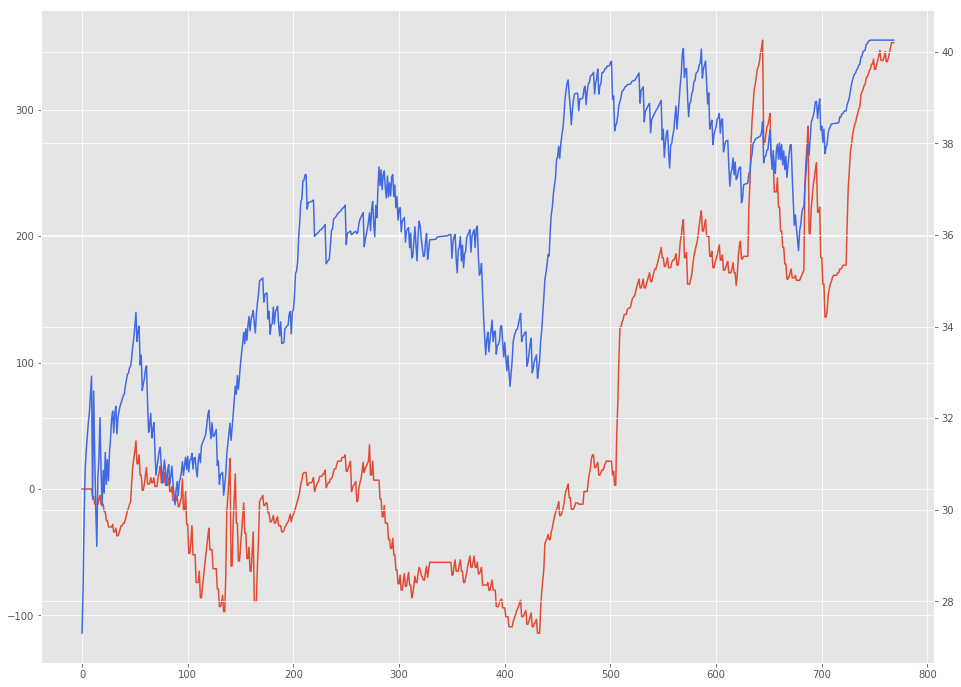

In [6]:
# Plot progress for a user
progress_over_time = df[(df['UserId'] == 40281) & (df['Subject'] == 'Rekenen')]['Progress'].cumsum().to_numpy()
x = range(len(progress_over_time))

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(x, progress_over_time)

ax2 = ax1.twinx()

# Plot trueskill over time for a user
mean_over_time = df[(df['UserId'] == 40281) & (df['Subject'] == 'Rekenen')]['MeanDelta'].cumsum().to_numpy() + 25
ax2.plot(x, mean_over_time, color='royalblue');

In [7]:
# Look at correlation between predicted correctness and actual correctness
preds = df[df['CorrectProbability'] > 0]
preds.corr()

,SubmittedAnswerId,Correct,Progress,UserId,ExerciseId,Difficulty,MeanDelta,StdDelta,Quality,CorrectProbability,ExerciseRating
SubmittedAnswerId,1.000000,-0.093953,0.008585,0.004653,-0.212338,0.208612,NaN,NaN,0.142593,-0.091877,0.154167
Correct,-0.093953,1.000000,0.680626,-0.034819,0.003838,-0.226671,NaN,NaN,-0.237293,0.229497,-0.206526
Progress,0.008585,0.680626,1.000000,0.009644,-0.004635,0.043706,NaN,NaN,-0.018880,0.000236,0.012893
UserId,0.004653,-0.034819,0.009644,1.000000,0.166702,0.103101,NaN,NaN,0.014922,-0.056591,0.073807
ExerciseId,-0.212338,0.003838,-0.004635,0.166702,1.000000,0.131845,NaN,NaN,0.021645,-0.129140,0.132997
Difficulty,0.208612,-0.226671,0.043706,0.103101,0.131845,1.000000,NaN,NaN,0.597372,-0.599749,0.808492
MeanDelta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StdDelta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quality,0.142593,-0.237293,-0.018880,0.014922,0.021645,0.597372,NaN,NaN,1.000000,-0.837292,0.836713
CorrectProbability,-0.091877,0.229497,0.000236,-0.056591,-0.129140,-0.599749,NaN,NaN,-0.837292,1.000000,-0.790738


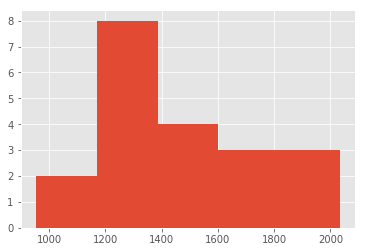

In [8]:
# Histogram of number of answers per user
df.groupby('UserId').count()['SubmittedAnswerId'].hist(bins=5);

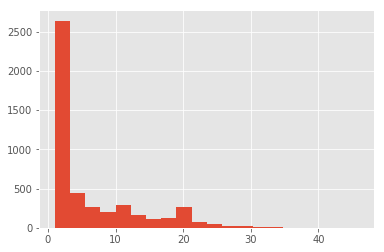

In [9]:
# Histogram of number of times an exercise was done
df.groupby('ExerciseId').count()['SubmittedAnswerId'].hist(bins=20);

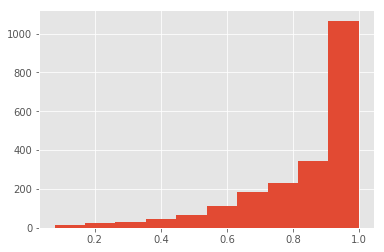

In [10]:
# Distribution of probabilities
df[df['CorrectProbability'] > 0]['CorrectProbability'].hist();

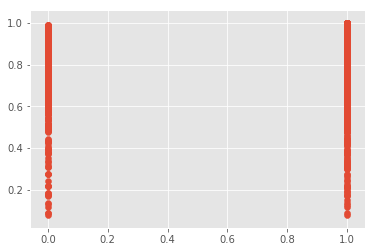

In [11]:
x = df[df['CorrectProbability'] > 0]['Correct']
y = df[df['CorrectProbability'] > 0]['CorrectProbability']
plt.scatter(x, y)

In [12]:
df[df['Correct'] == 0]['CorrectProbability'].mean()

0.0490021566107037

In [13]:
df[df['Correct'] == 1]['CorrectProbability'].mean()

0.06393467073970492